In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import os
import matplotlib.pyplot as plt
%matplotlib inline
import factor_analyzer as FA
from scipy.stats import zscore
from sklearn.decomposition import PCA
import scipy.stats as sts

In [2]:
kgds=pd.read_csv('datasets_180_408_data.csv')
kgds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
kgds.drop(columns='Unnamed: 32',inplace=True)

In [4]:
kgds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
kgds.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
kgds.duplicated().sum()

0

In [7]:
kgdsfeat=kgds.iloc[:,2:32]
kgdsfeat
kgdstar=kgds.iloc[:,1]
kgdstar

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [8]:
kgdstar=kgds.iloc[:,1]
kgdstar

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [9]:
kgdstar.shape

(569,)

In [10]:
kgdsfeat.shape

(569, 30)

In [11]:
kgdsfeat.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
def pltboxplt(ds,nr,nc,clr):    
    fig, axes = plt.subplots(nrows=nr,ncols=nc,squeeze=False)
    fig.set_size_inches(18, 20)
    itot=len(ds.columns) -1
    irow=0
    icol=0
    for cols in ds.columns:
        if cols!='Names' and itot !=0 and irow <=nr-1:
            sns.boxplot(ds[cols],ax=axes[irow][icol],color=clr, orient='v')
            #edds[cols].plot.hist(ax=axes[irow][icol],legend=True,color='cadetblue')
            icol=icol+1
            if icol==nc:
                irow=irow+1
                icol=0
                itot=itot-1
    return 

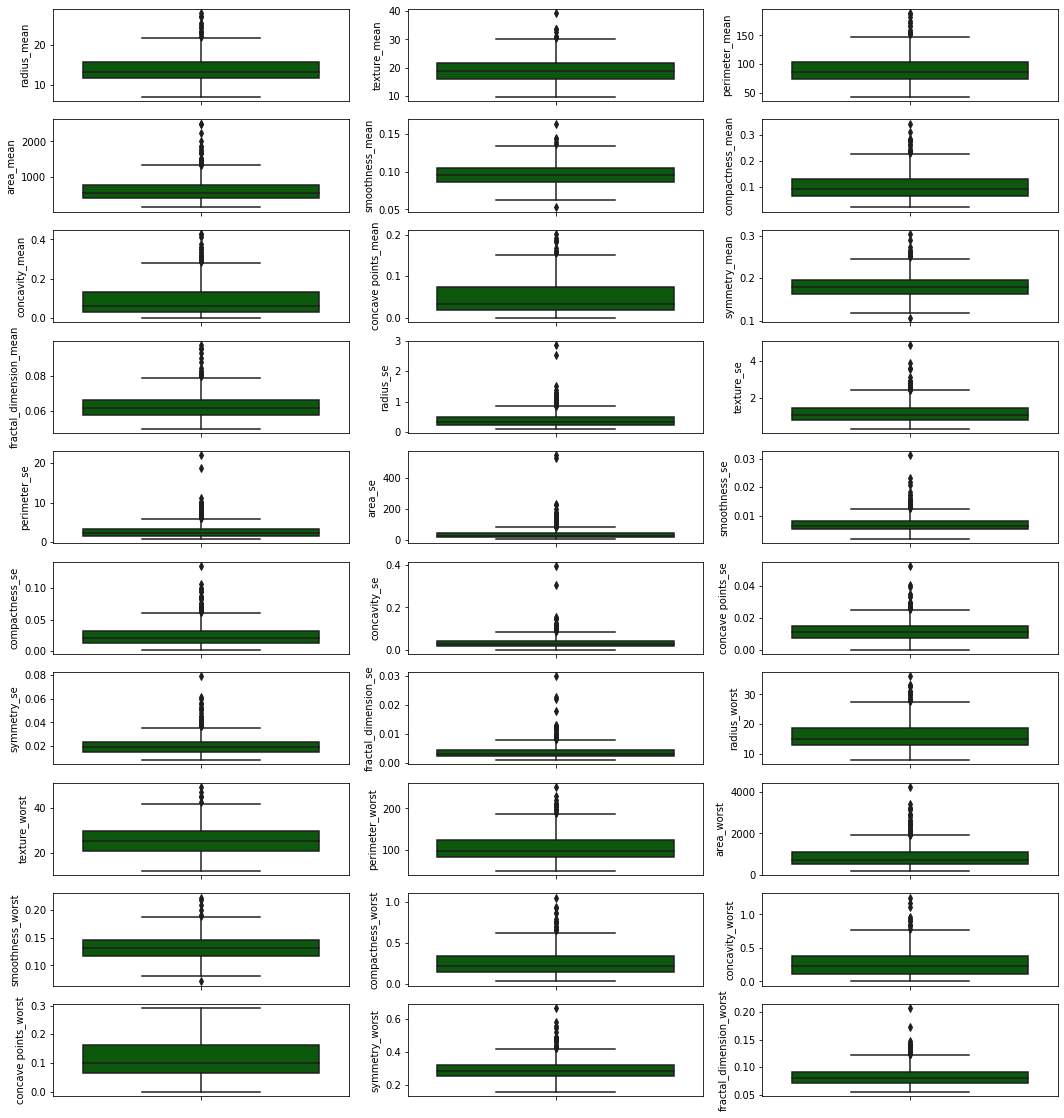

In [13]:
pltboxplt(kgdsfeat,10,3,'darkgreen')

In [14]:
def customhistplot(data,nr,nc,clr):    
    fig, axes = plt.subplots(nrows=nr,ncols=nc,squeeze=False)
    fig.set_size_inches(15, 20)
    itot=len(data.columns) -1
    irow=0
    icol=0
    for cols in data.columns:
        if  itot !=0 and irow <nr:
            data[cols].plot.hist(ax=axes[irow][icol],legend=True,color=clr)
            icol=icol+1
            if icol==nc:
                irow=irow+1
                icol=0
                itot=itot-1
            
        
    return

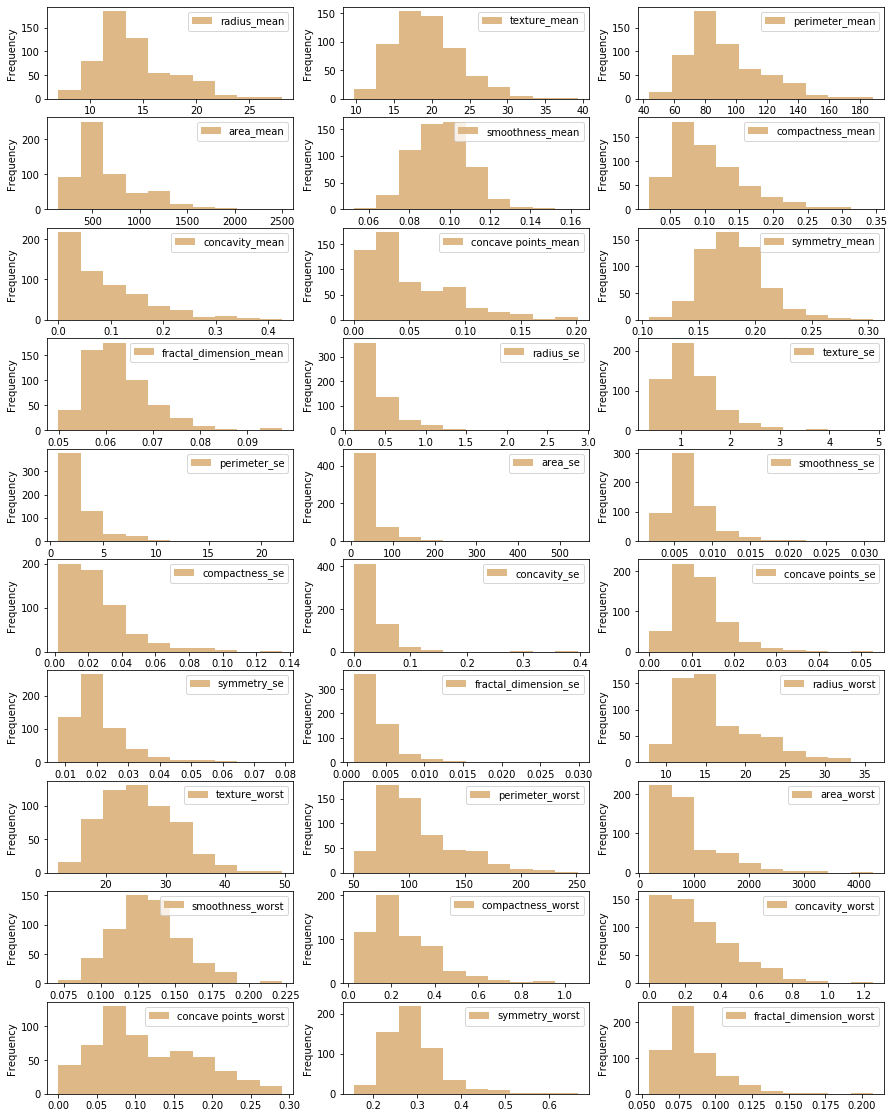

In [15]:
customhistplot(kgdsfeat,10,3,'burlywood')

In [16]:
q1,q3 = np.percentile(kgdsfeat['concave points_worst'],[25,75])
print (q3-q1)

0.09646999999999999


In [17]:
c=kgdsfeat['concave points_worst']
iq=sts.iqr(c)
print (iq)

0.09646999999999999


## OUTLIER TREATMENT
def remove_outlier(col):
    #sorted(col)
    Q1,Q3=np.quantile(col,[0.25,0.75])
    #Q3=np.quantile(col,0.75)
    IQR=Q3-Q1
    miqr= 1.5*IQR
    lr= Q1-miqr
    ur= Q3+miqr
    return lr, ur

In [18]:
def process_remove_outlier(ds):
    for cols in ds.columns:
        #lr,ur= remove_outlier(cols)
        #print (lr,ur)
        Q1,Q3=ds[cols].describe()[['25%','75%']]
        IQR=Q3-Q1
        miqr= 1.5*IQR
        lr= Q1-miqr
        ur= Q3+miqr
        ds[cols]=np.where(ds[cols]>ur,ur,ds[cols])
        ds[cols]=np.where(ds[cols]<lr,lr,ds[cols])
    
    
    return ds

In [19]:
kgds_df= process_remove_outlier(kgdsfeat)
kgds_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


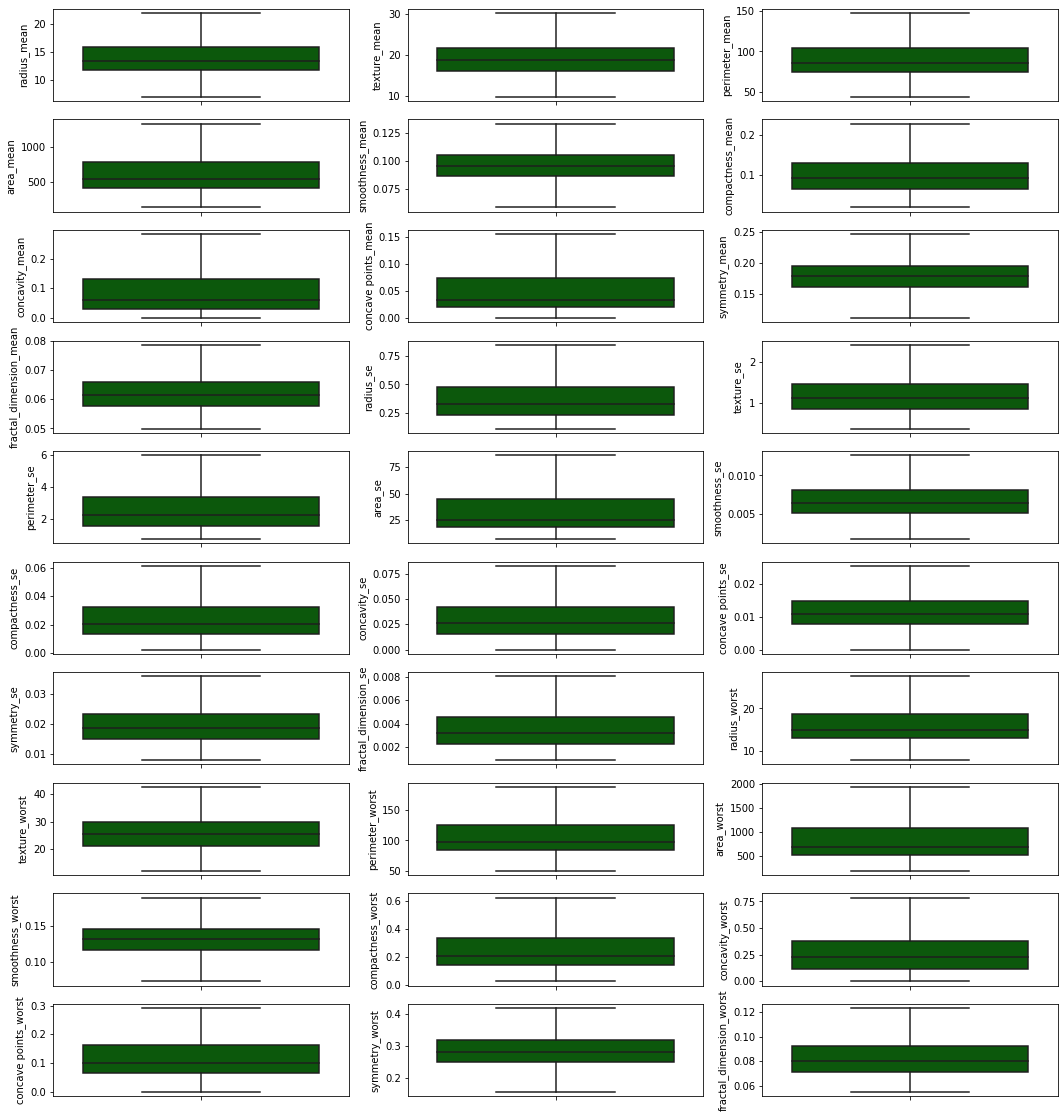

In [20]:
pltboxplt(kgds_df,10,3,'darkgreen')

In [21]:
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
data_new=kgds_df.apply(zscore)
data_new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,...,2.021750,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,...,1.637740,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,...,0.610078,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,...,2.085025,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456


In [22]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

In [23]:
kmd=k_means.fit(data_new)

In [24]:
kmd.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data_new,kmd.labels_)

0.3444332657736442

In [26]:
kmd1=k_means.fit(data_new)
kmd1.labels_
kmd1.inertia_

10990.620325179112

In [27]:
wss=[]
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(data_new)
    wss.append(KM.inertia_)

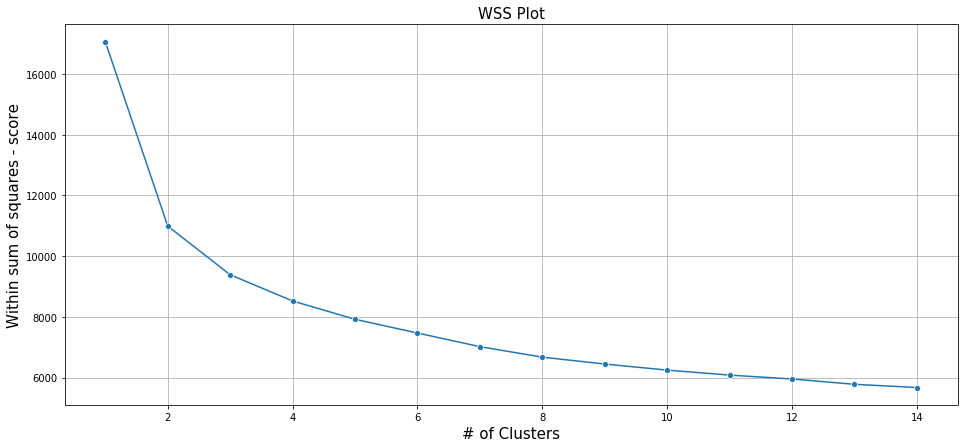

In [28]:
plt.figure(figsize=(16,7))
sns.lineplot(y=wss,x=range(1,15),marker='o')
plt.xlabel('# of Clusters',fontsize=15)
plt.ylabel('Within sum of squares - score',fontsize=15)
plt.title('WSS Plot',fontsize=15)
plt.grid()
plt.show()

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

silscore=[]

for i in range(1,15):
    if i> 1 :
        KM = KMeans(n_clusters=i)
        KM.fit(data_new)
        silscore.append(silhouette_score(data_new,KM.labels_))
    else:
        silscore.append(0)
        
    
    

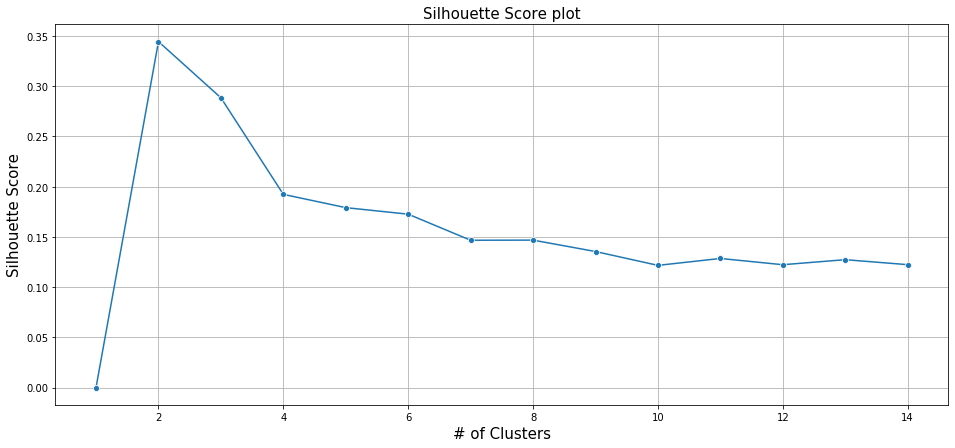

In [30]:
plt.figure(figsize=(16,7))
sns.lineplot(y=silscore,x=range(1,15),marker='o')
plt.xlabel('# of Clusters',fontsize=15)
plt.ylabel('Silhouette Score',fontsize=15)
plt.title('Silhouette Score plot',fontsize=15)
plt.grid()
plt.show()

In [31]:
data_new.shape
data_new['diagnosis']=kgdstar
data_new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,M
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,M
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,M
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,M
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,...,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016,M
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,...,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155,M
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,...,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817,M
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,...,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456,M


In [32]:
data_new_dclass=data_new.copy()
for feature in data_new_dclass.columns: 
    if data_new_dclass[feature].dtype == 'object': 
        data_new_dclass[feature] = pd.Categorical(data_new_dclass[feature]).codes

In [33]:
data_new_dclass.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,1
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,1
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,1
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,1
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,1


In [34]:

data_new.drop(columns='diagnosis',inplace=True)


In [35]:
KM2 = KMeans(n_clusters = 2)
KM2.fit(data_new)
KM2.labels_
KM2.inertia_

10990.620325179112

In [36]:
yk=KM2.labels_

In [37]:
from sklearn.model_selection import train_test_split
X = data_new_dclass.drop(['diagnosis'],axis=1)
y = data_new_dclass.pop('diagnosis')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' ,random_state=123)

In [39]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [40]:
from sklearn import tree

train_char_label = ['B', 'M']
Credit_Tree_File = open('D:\Personal\Great lakes - PFDSBA\Whitepapers and blogs\cancer_desc_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [41]:
pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)

,0
concave points_worst,70.914877
area_worst,11.511367
radius_worst,4.212474
smoothness_worst,2.931115
fractal_dimension_worst,2.031299
smoothness_mean,1.622635
radius_se,1.342513
perimeter_worst,1.307519
texture_worst,1.076928
compactness_se,0.998545


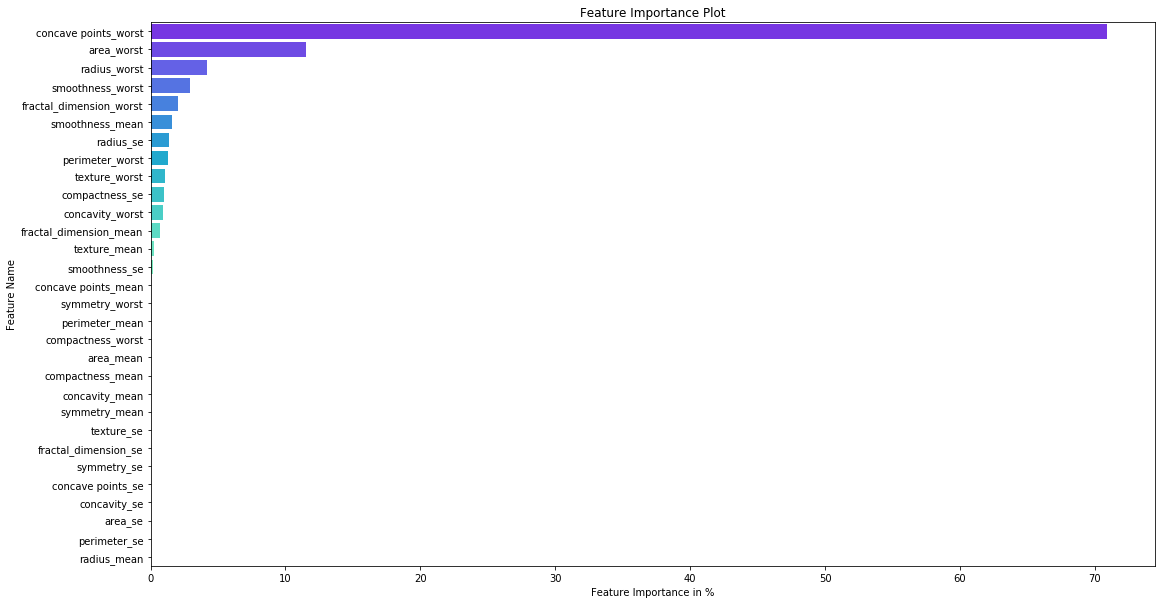

In [42]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(18,10))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [44]:
# AUC and ROC for the training data

# predict probabilities
probs_xtrain = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only

probs_xtrain=probs_xtrain[:,1]

# predict probabilities
probs_xtest = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only

probs_xtest=probs_xtest[:,1]
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs_xtrain)
print('AUC: %.3f' % auc_train)

auc_test = roc_auc_score(y_test, probs_xtest)
print('AUC: %.3f' % auc_test)

AUC: 1.000
AUC: 0.916


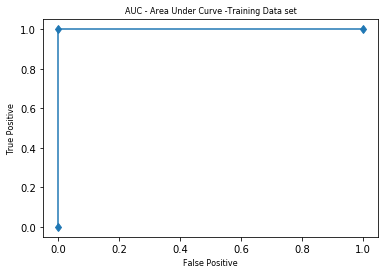

In [45]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_xtrain)
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='d')
plt.xlabel('False Positive',fontsize=8)
plt.ylabel('True Positive',fontsize=8)
plt.title('AUC - Area Under Curve -Training Data set',fontsize=8)
# show the plot
plt.show()

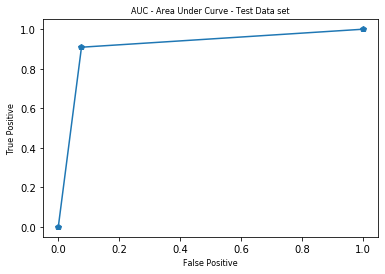

In [46]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_xtest)
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='p')
plt.xlabel('False Positive',fontsize=8)
plt.ylabel('True Positive',fontsize=8)
plt.title('AUC - Area Under Curve - Test Data set',fontsize=8)
# show the plot
plt.show()

In [47]:
y_train.index[1]

421

In [48]:
# compare Kmeans vs Xtrain
auc_km_xtrain = roc_auc_score(yk[X_train.index], probs_xtrain)
print('AUC: %.3f' % auc_km_xtrain)

AUC: 0.925


In [49]:
# compare Kmeans vs Xtest
auc_km_xtest = roc_auc_score(yk[X_test.index], probs_xtest)
print('AUC: %.3f' % auc_km_xtest)

AUC: 0.908


In [50]:
#ROC Curve for train vs kmeans
fpr, tpr, thresholds = roc_curve(yk[X_train.index], probs_xtrain)
print (tpr,fpr)
fpr1, tpr1, thresholds = roc_curve(yk[X_test.index], probs_xtest)
print (tpr1,fpr1)

[0.         0.92647059 1.        ] [0.         0.07633588 1.        ]
[0.         0.94642857 1.        ] [0.         0.13043478 1.        ]


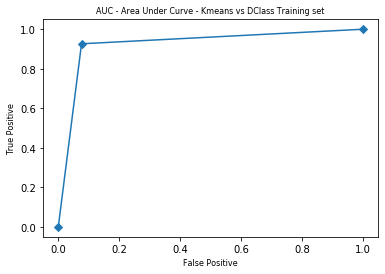

In [51]:
# calculate roc curve
from sklearn.metrics import roc_curve
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='D')
# show the plot
plt.xlabel('False Positive',fontsize=8)
plt.ylabel('True Positive',fontsize=8)
plt.title('AUC - Area Under Curve - Kmeans vs DClass Training set',fontsize=8)
plt.show()


In [52]:
# Kmeans vs test ROC curve
fpr, tpr, thresholds = roc_curve(yk[X_test.index], probs_xtest)
print (tpr)

[0.         0.94642857 1.        ]


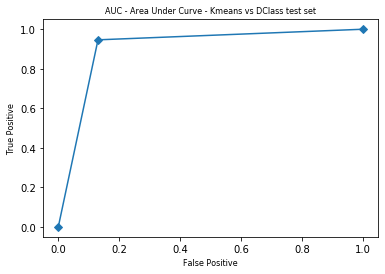

In [53]:
# calculate roc curve
from sklearn.metrics import roc_curve
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='D')
# show the plot
plt.xlabel('False Positive',fontsize=8)
plt.ylabel('True Positive',fontsize=8)
plt.title('AUC - Area Under Curve - Kmeans vs DClass test set',fontsize=8)
plt.show()

In [54]:
auc_km_orig = roc_auc_score(yk, y)
print('AUC: %.3f' % auc_km_orig)

AUC: 0.915


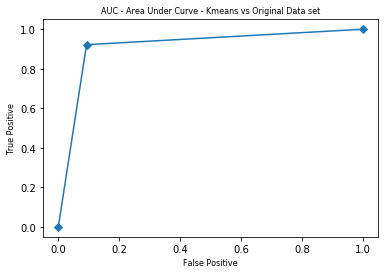

In [55]:
# calculate roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(yk, y)
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='D')
# show the plot
plt.xlabel('False Positive',fontsize=8)
plt.ylabel('True Positive',fontsize=8)
plt.title('AUC - Area Under Curve - Kmeans vs Original Data set',fontsize=8)
plt.show()

In [56]:
y[X_train.index]

178    0
421    0
57     1
514    1
548    0
      ..
552    0
393    1
75     1
337    1
523    0
Name: diagnosis, Length: 398, dtype: int8

In [57]:
np.equal(y_train,y[X_train.index])

178    True
421    True
57     True
514    True
548    True
       ... 
552    True
393    True
75     True
337    True
523    True
Name: diagnosis, Length: 398, dtype: bool

In [58]:
# final data set with all values 

data_consolidated=data_new_dclass.copy()
data_consolidated['diagnosis']=y
data_consolidated['kmeansoutput']=yk



In [59]:
X_train.index.values

array([178, 421,  57, 514, 548, 456, 511,  69, 410, 382,  41,  70, 183,
       333, 324, 392, 427,  43,  36, 209, 330, 344, 555, 170, 375, 143,
       360, 449, 527, 227, 318,  53, 165,  74, 564,  51, 132,  44, 121,
       263, 494, 312, 243, 403, 341, 528, 148, 154, 525, 240, 406, 133,
       162, 321, 388, 176, 222, 411, 220,  15, 198,  13, 175, 155, 391,
       352, 231, 248, 347, 211, 160, 236,  17, 328, 538, 153, 230, 353,
       445, 518,  86,  73, 509, 283, 168,   7, 405, 413, 265,  93, 539,
       424, 374, 286, 479, 215,   9, 351, 336, 164, 152, 376, 483, 335,
       234, 169, 524, 399,  45, 346, 112,  90, 277, 126,  78, 167, 480,
       501, 373, 134, 423, 532,  29, 387, 102, 315, 238, 430, 458, 517,
       432, 259, 158, 210,  20, 289, 486, 206, 400, 123, 345, 380, 459,
       119, 462, 565, 251, 252, 553, 135, 453, 414, 247, 326, 389, 245,
       182, 428, 543, 369, 537, 311, 534,  85, 381, 159, 177, 108, 242,
       172, 115, 298,  35,  37,  34,   1, 398, 446, 554, 101, 15

In [60]:
data_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [61]:
for i in range(0,X_train.count()[0]-1):
    data_consolidated.loc[X_train.index[i],'Training_pred']=probs_xtrain[i]


data_consolidated

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,kmeansoutput,Training_pred
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,1,1,NaN
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,1,1,1.0
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,1,1,NaN
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,1,1,1.0
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,...,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016,1,1,1.0
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,...,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155,1,1,1.0
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,...,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817,1,1,1.0
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,...,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456,1,1,NaN


In [62]:
for i in range(0,X_test.count()[0]-1):
    data_consolidated.loc[X_test.index[i],'Test_Pred']=probs_xtest[i]


data_consolidated

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,kmeansoutput,Training_pred,Test_Pred
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,1,1,NaN,1.0
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,1,1,1.0,NaN
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,1,1,NaN,1.0
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,1,1,1.0,NaN
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,1,1,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,...,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016,1,1,1.0,NaN
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,...,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155,1,1,1.0,NaN
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,...,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817,1,1,1.0,NaN
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,...,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456,1,1,NaN,1.0


In [63]:
data_consolidated['id']=kgds['id']
data_consolidated

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,kmeansoutput,Training_pred,Test_Pred,id
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,2.641905,2.246192,2.296076,2.443918,2.225247,1,1,NaN,1.0,842302
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,-0.443388,-0.137634,1.087084,-0.234408,0.355314,1,1,1.0,NaN,842517
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,1.223448,0.920718,1.955000,1.369057,0.265197,1,1,NaN,1.0,84300903
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,2.641905,2.119474,2.175786,2.443918,2.482456,1,1,1.0,NaN,84348301
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,-0.314469,0.665254,0.729259,-0.951602,-0.410683,1,1,NaN,1.0,84358402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,...,-0.270329,0.719489,1.629151,-1.516438,-0.763016,1,1,1.0,NaN,926424
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,...,-0.404152,0.267358,0.733827,-0.565135,-1.062155,1,1,1.0,NaN,926682
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,...,0.417005,0.362650,0.414069,-1.222872,-0.321817,1,1,1.0,NaN,926954
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,...,2.641905,2.619251,2.289985,2.249756,2.482456,1,1,NaN,1.0,927241


In [64]:
data_consolidated.to_csv('Bcan-wiscon-Comparedfinaloutput.csv')

In [65]:
X_test
             

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
107,-0.510300,-0.170833,-0.544309,-0.567287,-0.840801,-0.710786,-0.819482,-0.780386,-0.788439,-0.303205,...,-0.631409,0.304434,-0.662248,-0.643498,-0.619247,-0.375426,-0.380426,-0.459633,0.198509,-0.719209
437,-0.006867,-0.782713,-0.076597,-0.093633,-0.854697,-0.897239,-0.698808,-0.508310,-0.358401,-0.565203,...,-0.114305,-0.672574,-0.172422,-0.210232,-0.569920,-0.873585,-0.796063,-0.610225,-0.280859,-0.688544
195,-0.345486,-0.699057,-0.391445,-0.404377,-1.232825,-1.004450,-0.652895,-0.659109,0.083156,-0.925449,...,-0.502678,-0.603142,-0.497824,-0.524608,-1.009375,-0.695621,-0.468115,-0.491153,0.274687,-0.866901
141,0.613434,-0.287951,0.588711,0.567843,0.069048,0.212360,0.102028,0.289304,0.206024,-0.019375,...,0.815174,-0.062564,0.698242,0.806124,-0.036296,-0.184149,0.058019,0.106491,-0.156372,-0.110292
319,-0.489323,-0.538917,-0.562115,-0.532542,-1.513679,-1.391948,-0.995685,-0.839429,-1.287590,-1.090757,...,-0.716502,-0.899054,-0.781260,-0.702838,-2.157787,-1.420649,-1.248853,-1.313846,-1.811862,-1.503354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-0.747033,-0.051325,-0.753195,-0.754127,-0.790335,-0.526967,-0.434571,-0.911505,0.858760,0.010256,...,-0.679410,0.220124,-0.635001,-0.693159,-0.327771,-0.393642,-0.064644,-0.730362,0.295125,-0.031439
279,-0.063803,-0.973925,-0.110904,-0.171647,-0.080887,-0.533858,-0.570820,-0.304318,1.162091,-0.635381,...,-0.262672,-0.646123,-0.261054,-0.378572,-0.614762,-0.542880,-0.624233,-0.223469,0.146484,-0.890056
390,-1.139591,-1.681411,-1.120156,-1.042908,0.270180,-0.563447,-0.916996,-0.767886,-0.028193,0.481228,...,-1.048147,-1.652887,-1.048409,-0.958295,0.093746,-0.594728,-0.925569,-0.725490,0.113040,-0.383147
91,0.391684,0.837812,0.375916,0.289879,-0.312006,0.007667,0.342157,0.698882,-0.346882,-0.254860,...,0.053700,0.031665,0.024887,-0.039997,-0.291898,-0.351604,0.080322,0.502383,-0.594863,-0.942625


In [66]:
X_test.index

Int64Index([107, 437, 195, 141, 319, 295, 114, 202, 268, 342,
            ...
            450, 556, 323, 127,  38, 420, 279, 390,  91, 297],
           dtype='int64', length=171)

In [67]:
y_test.loc[[141]]

141    1
Name: diagnosis, dtype: int8

In [68]:
X_test.loc[[141,],:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
141,0.613434,-0.287951,0.588711,0.567843,0.069048,0.21236,0.102028,0.289304,0.206024,-0.019375,...,0.815174,-0.062564,0.698242,0.806124,-0.036296,-0.184149,0.058019,0.106491,-0.156372,-0.110292


In [70]:
ab=KM2.predict(X_test.loc[[141,],:])

In [71]:
ab

array([1])

In [72]:
yk[141]

1

In [73]:
print('the classfication report with test data set',classification_report(y_test, probs_xtest))

the classfication report with test data set               precision    recall  f1-score   support

           0       0.94      0.92      0.93       105
           1       0.88      0.91      0.90        66

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



In [74]:
print('the classfication report with training data set',classification_report(y_train, probs_xtrain))

the classfication report with training data set               precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [75]:
print('the classfication report between Kmeans Y and originaldata target',classification_report(yk, y))

the classfication report between Kmeans Y and originaldata target               precision    recall  f1-score   support

           0       0.96      0.91      0.93       377
           1       0.83      0.92      0.88       192

    accuracy                           0.91       569
   macro avg       0.90      0.91      0.90       569
weighted avg       0.92      0.91      0.91       569



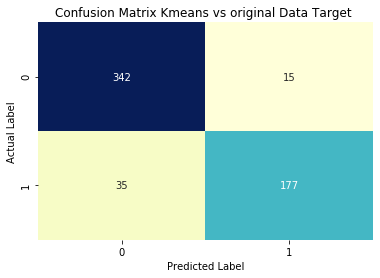

In [76]:
sns.heatmap(confusion_matrix(y,yk),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Kmeans vs original Data Target ')
plt.show()

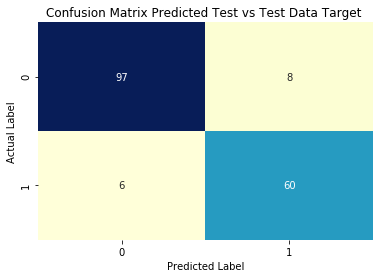

In [77]:
sns.heatmap(confusion_matrix(y_test,probs_xtest),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Predicted Test vs Test Data Target ')
plt.show()

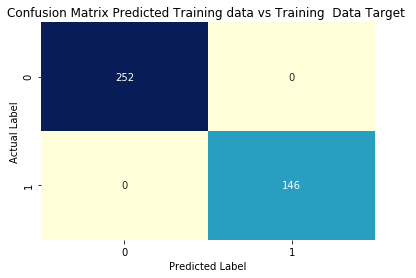

In [78]:
sns.heatmap(confusion_matrix(y_train,probs_xtrain),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Predicted Training data vs Training  Data Target ')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestClassifier